### Summary

Enhance image by:
- Addition and Subtraction (Brightness), Multiplication (Contrast)
- Thresholding & Masking (grayscale to binary image with clear main subject)
- Bitwise Operations (like set theory operations but with images; OR, AND, XOR)

### Import Libraries and Download Assets

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)
    
    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)  

### Main

Let's see our image first to see what's flawed

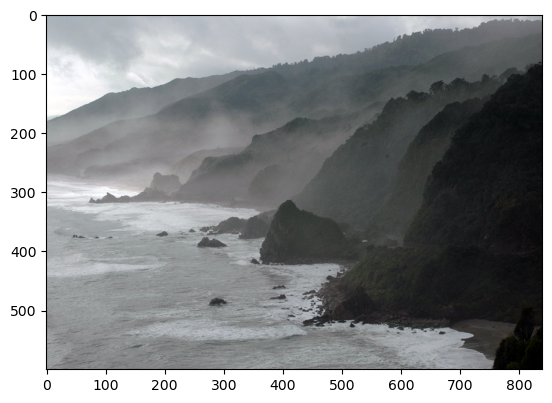

In [2]:
coast = cv2.imread("New_Zealand_Coast.jpg", 1)
coast = cv2.cvtColor(coast, cv2.COLOR_BGR2RGB)

plt.imshow(coast)

It looks pretty dark, let's bright it up by using arithmtic operations.

- Addition increases brightness
- Subtraction decreases brightness

[[[224 233 238]
  [226 233 239]
  [224 231 239]
  ...
  [213 220 226]
  [214 221 227]
  [217 222 226]]

 [[226 233 239]
  [226 233 239]
  [225 232 240]
  ...
  [216 221 227]
  [217 222 228]
  [214 219 223]]

 [[223 230 236]
  [223 230 238]
  [222 231 238]
  ...
  [216 221 225]
  [216 221 225]
  [215 220 224]]

 ...

 [[203 207 206]
  [201 205 204]
  [200 200 202]
  ...
  [ 50  50  50]
  [ 50  50  50]
  [ 50  50  50]]

 [[199 203 204]
  [199 203 204]
  [202 202 204]
  ...
  [ 50  50  50]
  [ 50  50  50]
  [ 50  50  50]]

 [[200 204 205]
  [202 203 205]
  [202 203 205]
  ...
  [ 50  50  50]
  [ 50  50  50]
  [ 50  50  50]]]


Text(0.5, 1.0, 'Darkened')

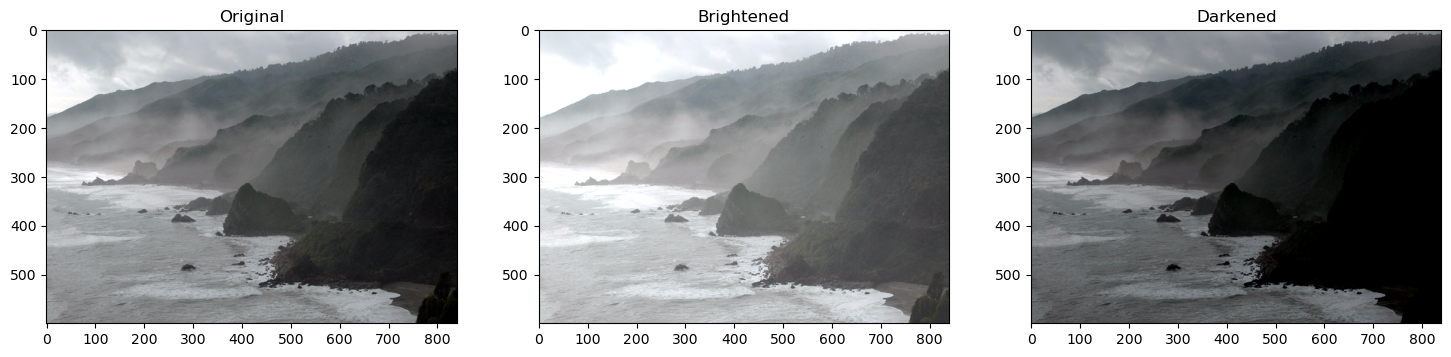

In [44]:
# create a matrix of a specific value to modify the pixel values of the image (must be in uint8)
modifier = np.ones(coast.shape, dtype="uint8") * 50

coast_bright = cv2.add(coast, modifier)
coast_dim = cv2.subtract(coast, modifier)

plt.figure(figsize=[18, 5])

plt.subplot(131)
plt.imshow(coast)
plt.title("Original")

plt.subplot(132)
plt.imshow(coast_bright)
plt.title("Brightened")

plt.subplot(133)
plt.imshow(coast_dim)
plt.title("Darkened")

We can also change the contrast of the image by multiplication

For matrix element value n:
- n > 1 will create a bright contrast
- n < 1 will create a dim contrast

Text(0.5, 1.0, 'High Contrast')

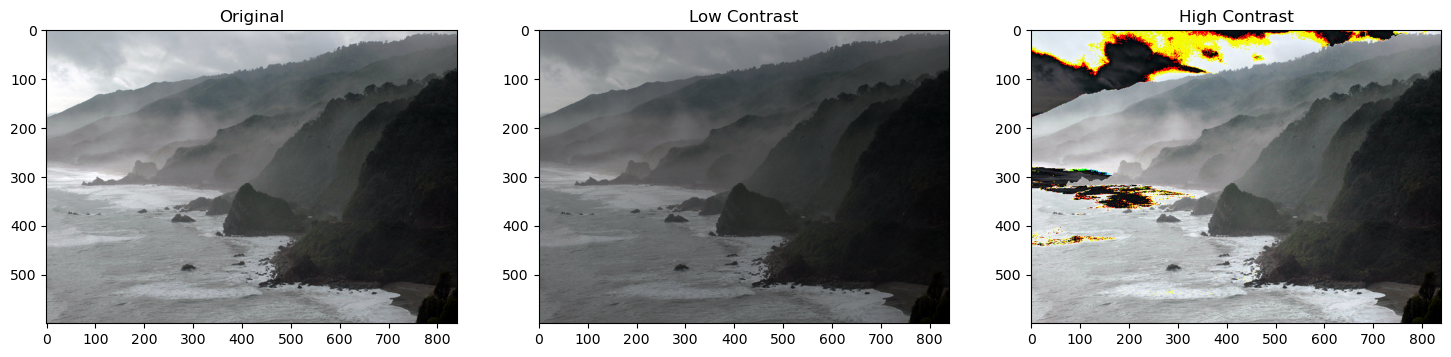

In [9]:
matrix_bright = np.ones(coast.shape) * 1.3
matrix_dim = np.ones(coast.shape) * 0.7

# must make img dtype in np.float64() and then the contrasted image to np.uint8()
coast_lowcon = np.uint8(cv2.multiply(np.float64(coast), matrix_dim))
coast_highcon = np.uint8(cv2.multiply(np.float64(coast), matrix_bright))

plt.figure(figsize=[18,5])

plt.subplot(131)
plt.imshow(coast)
plt.title("Original")

plt.subplot(132)
plt.imshow(coast_lowcon)
plt.title("Low Contrast")

plt.subplot(133)
plt.imshow(coast_highcon)
plt.title("High Contrast")

Uh oh how come there's some weird sunburn in the high contrast? That's because the values in those area are becoming higher than the allowed maximum (255) and thus there is an overflowing issue.

We solve this by using `np.clip(cv2.multiply(), 0, 255)` (setting boundary of 0 to 255)

Text(0.5, 1.0, 'High Contrast')

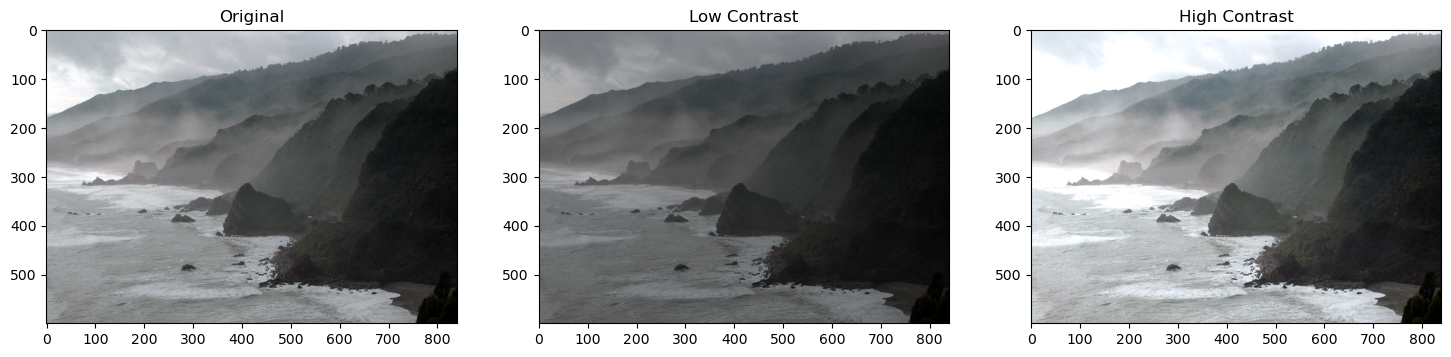

In [10]:
coast_highcon = np.uint8(np.clip(cv2.multiply(np.float64(coast), matrix_bright), 0, 255))

plt.figure(figsize=[18,5])

plt.subplot(131)
plt.imshow(coast)
plt.title("Original")

plt.subplot(132)
plt.imshow(coast_lowcon)
plt.title("Low Contrast")

plt.subplot(133)
plt.imshow(coast_highcon)
plt.title("High Contrast")

We can further edit an image by creating masks. 

Masks allow us to process specific parts of an image whilst making other parts untouched. 

Image Thresholding is used to create binary images (only black and white; no hue) from grayscale images. Different thresholds will create different binary images from the same original image.

This can be doneby using: `cv2.threshold(src, thresh, maxval, type)`

where:
- src is the image
- thresh is the threshold value (what pixel value is considered black)
- maxval is what the maximum value is (usually 255)
- type is what type of threshold algorithm (see cv2.THRESH_ for examples; usually cv2.THRESH_BINARY)

[[168 167 166 ... 113  97  90]
 [169 169 168 ... 184 182 174]
 [167 165 163 ... 173 172 173]
 ...
 [ 36  36  36 ... 108 108 108]
 [ 36  36  36 ... 109 109 109]
 [ 36  36  36 ... 109 109 110]]


Text(0.5, 1.0, 'Binary')

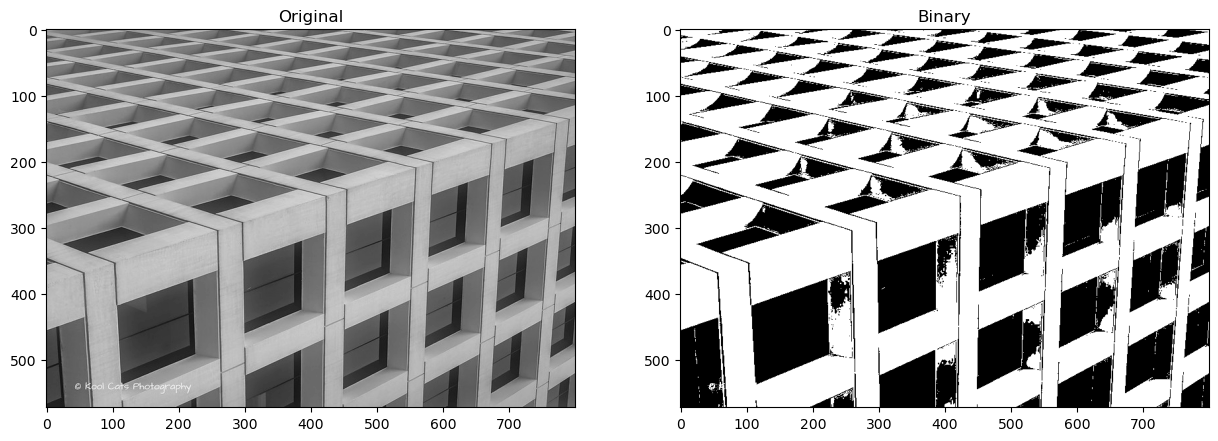

In [45]:
building = cv2.imread("building-windows.jpg", 0)
retval, building_bin = cv2.threshold(building, 110, 255, cv2.THRESH_BINARY) # retval means return value, just means some placeholder variable (not useful)

print(building)

plt.figure(figsize=[15,7])

# dont forget to put cmap="gray"
plt.subplot(121)
plt.imshow(building, cmap="gray")
plt.title("Original")

plt.subplot(122)
plt.imshow(building_bin, cmap="gray")
plt.title("Binary")

Binary Image conversions are useful because it can clear darkened main subjects to be more visible. An example is converting a poorly-lit musical sheet into a binary image to clearly see the sheet written without the bad shadows.

For this, we use a better and intricate version of `cv2.threshold()` called `cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)`

where:
- src is the image
- maxValue is what the maximum value is (usually 255)
- adaptiveMethod is what adaptive thresholding algorithm it uses (see cv2.ADAPTIVE_THRESH_ for more; generally cv2.ADAPTIVE_THRESH_MEAN_C)
- thresholdType is what type of threshold algorithm (see cv2.THRESH_ for examples; usually cv2.THRESH_BINARY)
- blockSize is an odd integer which represents the size of the pixel with its neighborhood used in calculating the threshold value
- C is some arbitrary value to subtract from weighted mean (adjust guessingly on value to make image as clear as possible)

Text(0.5, 1.0, 'Adaptive Binary')

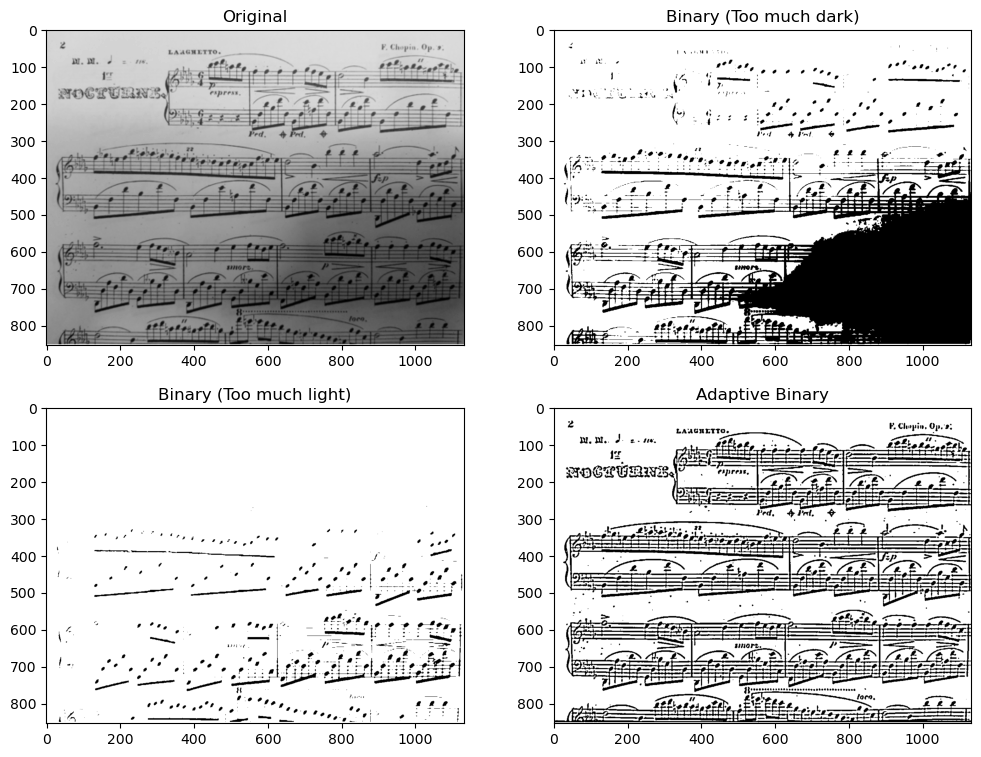

In [37]:
sheet = cv2.imread("Piano_Sheet_Music.png", 0)
retval, sheet_bin_low = cv2.threshold(sheet, 100, 255, cv2.THRESH_BINARY)
retval, sheet_bin_high = cv2.threshold(sheet, 40, 255, cv2.THRESH_BINARY)
sheet_abin = cv2.adaptiveThreshold(sheet, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 5)

plt.figure(figsize=[12,9])

plt.subplot(221)
plt.imshow(sheet, cmap="gray")
plt.title("Original")

plt.subplot(222)
plt.imshow(sheet_bin_low, cmap="gray")
plt.title("Binary (Too much dark)")

plt.subplot(223)
plt.imshow(sheet_bin_high, cmap="gray")
plt.title("Binary (Too much light)")

plt.subplot(224)
plt.imshow(sheet_abin, cmap="gray")
plt.title("Adaptive Binary")

We can also have more operations to use with images like in set theory through bitwise operations: AND, OR, XOR. This is different than the addition, subtraction and multiplication because it doesn't really affect the pixel values but rather affects the image through layering. You can however imagine it as 0 (black) and 1 (white) and applying the bitwise operations on them since binary images only have two pixel values.

The bitwise operation can be used as `cv2.bitwise_and()`, `cv2.bitwise_or()`, `cv2.bitwise_xor()`, `cv2.bitwise_not()`. The first three have the same parameters of src1, src2 and mask. not only needs src.

where:
- src1 is the first image
- src2 is the second image
- mask (optional) is some 8-bit single array to change the output array or image

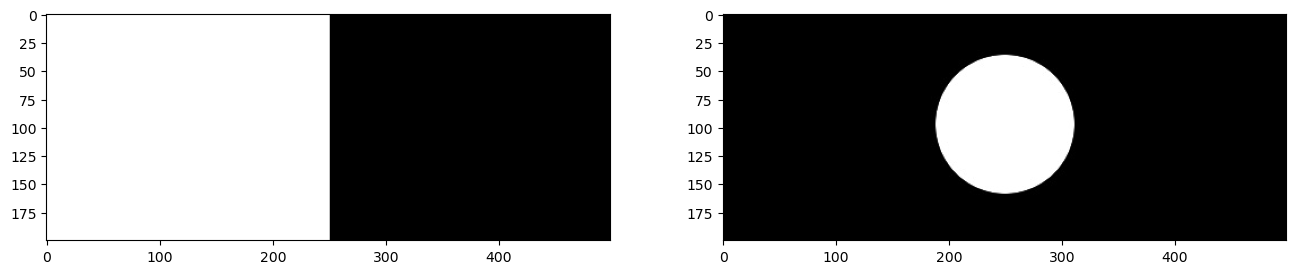

In [49]:
rec = cv2.imread("rectangle.jpg", 0)
circ = cv2.imread("circle.jpg", 0)

plt.figure(figsize=[16,4])

plt.subplot(121)
plt.imshow(rec, cmap="gray")

plt.subplot(122)
plt.imshow(circ, cmap="gray")

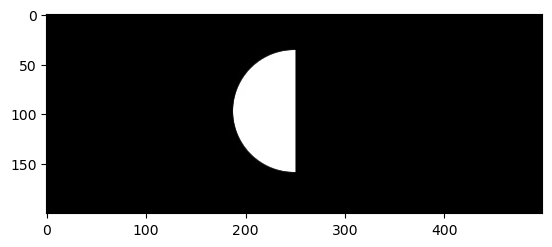

In [54]:
# AND (union)
result = cv2.bitwise_and(rec, circ)
plt.imshow(result, cmap="gray")

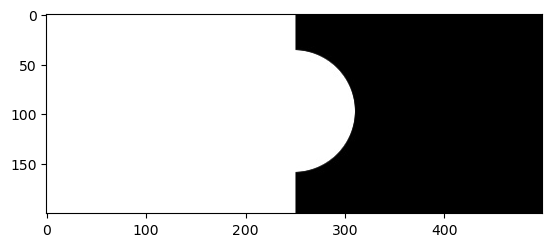

In [51]:
# OR (intersection)
result = cv2.bitwise_or(rec, circ)
plt.imshow(result, cmap="gray")

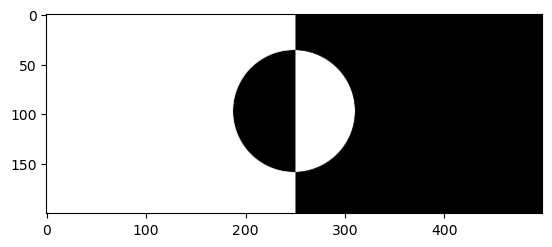

In [52]:
# XOR (symmetric difference)
result = cv2.bitwise_xor(rec, circ)
plt.imshow(result, cmap="gray")

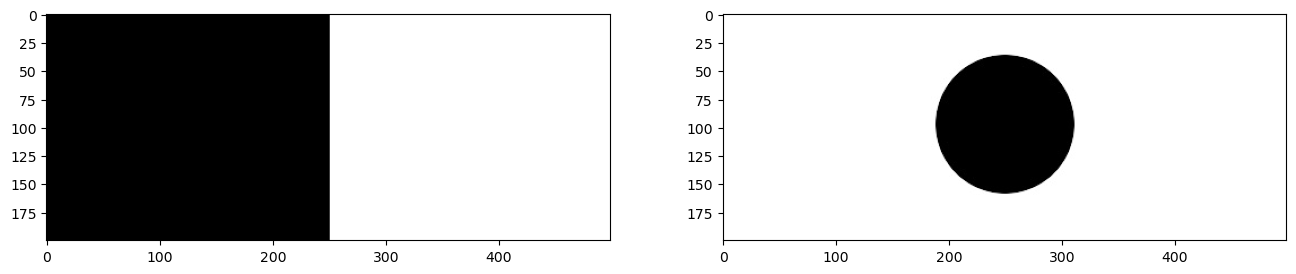

In [53]:
# NOT (black to white, white to black)
circ_inv = cv2.bitwise_not(circ)
rec_inv = cv2.bitwise_not(rec)

plt.figure(figsize=[16,4])

plt.subplot(121)
plt.imshow(rec_inv, cmap="gray")

plt.subplot(122)
plt.imshow(circ_inv, cmap="gray")

This is useful since it can do some sort of green screen and adding more layers to a specific part of an image with other images.